In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
def fun(x, coef):
    res = 0
    for c, value in enumerate(coef):
        res += value*(x**c)
    return res

## Dados Gerados sem ruído

In [95]:
gr_real_coef = [95.62, 29.71, 95.98]
gr_generated_coef = [92, 29.91, 95.99]
gr = pd.read_csv('../csv_examples/2_gerado.csv', header=None)
gr_x = gr.iloc[:,0].values
gr_y = gr.iloc[:,1].values

gr_y_c = map(lambda x: fun(x, gr_generated_coef), gr_x)
gr_y_c = list(gr_y_c)

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].scatter(gr_x,gr_y, s=0.8)
ax[0].set_title('Valor Gerado automaticamente')
ax[1].scatter(gr_x, gr_y_c, s=0.8)
ax[1].set_title('Valor Gerado por função em C')
plt.plot()
plt.savefig('GERADO_S_RUIDO.png')

SyntaxError: positional argument follows keyword argument (3184685627.py, line 2)

## Valores Gerados com Ruído

In [139]:
gr_r_real_coef = [56.63, 59.25, 78.74]
gr_r_generated_coef = [42.90, 60.12, 78.74]
gr_r = pd.read_csv('../csv_examples/2_gerado_ruido.csv', header=None)
gr_r_x = gr_r.iloc[:,0].values
gr_r_y = gr_r.iloc[:,1].values

gr_r_y_c = map(lambda x: fun(x, gr_r_generated_coef), gr_r_x)
gr_r_y_p = map(lambda x: fun(x, gr_r_real_coef), gr_r_x)
gr_r_y_p = list(gr_r_y_p)
gr_r_y_c = list(gr_y_c)

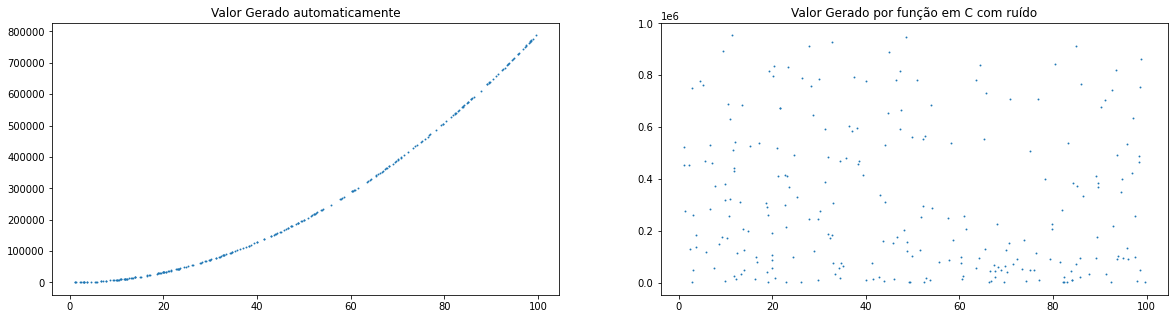

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].scatter(gr_r_x, gr_r_y, s=0.8)
ax[0].set_title('Valor Gerado automaticamente')
ax[1].scatter(gr_r_x, gr_r_y_c, s=0.8)
ax[1].set_title('Valor Gerado por função em C com ruído')
plt.plot()
plt.savefig('GERADO_C_RUIDO.png')

# This is a polynomial of order <built-in function ord>.


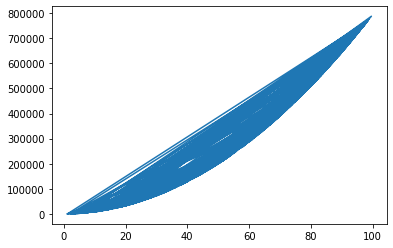

In [143]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

plt.plot(gr_r_x, PolyCoefficients(gr_r_x, gr_r_generated_coef))